In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [6]:
cd /Users/austinmcdonald/Desktop/ElectronExtraction/

/Users/austinmcdonald/Desktop/ElectronExtraction


In [10]:
folders = os.listdir()
folders.sort()
folders

['0000', '0500', '1000', '2000', '3000', '4000']

In [60]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob(folders[5]+'/*.txt')
#files.remove('.DS_Store')
#files.remove('Gol-350.txt')
#files.remove('Sig-350.txt')
files.sort()


In [61]:
aa = np.loadtxt(files[5],skiprows=5,delimiter=',')

In [62]:
len(aa[:,0])

10002

In [63]:
Xvals = np.zeros(10002) 
Yvals = np.zeros(10002)
LL = len(files)
for q in range(0,LL):
    Hold = np.loadtxt(files[q],skiprows=5,delimiter=',')
    Xvals += Hold[:,0] 
    Yvals += Hold[:,1]
X = Xvals/LL
Y = Yvals/LL

In [64]:
TriggerTime = find_nearest(X,0)
Trigger     = np.where(X==TriggerTime)[0][0]
baseline    = np.mean(Y[0:Trigger])
data = [X,Y-baseline]

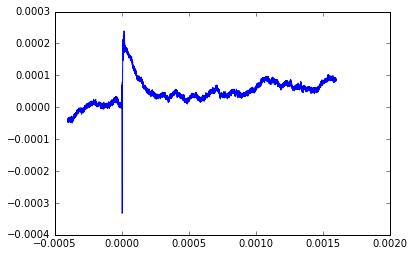

In [65]:
plt.plot(X,Y-baseline)

In [66]:
np.savetxt("mean-4000"+'.txt',data)

In [82]:
Datafiles = glob.glob('*.txt')
Datafiles.sort()
Datafiles

['mean-0000.txt',
 'mean-0500.txt',
 'mean-1000.txt',
 'mean-2000.txt',
 'mean-3000.txt',
 'mean-4000.txt']

In [85]:
names=[]
for f in Datafiles:
    a=f.split('-')[1].split('.')[0]
    a = a+' '+'kV/cm'
    names.append(a)
    print(a)

0000 kV/cm
0500 kV/cm
1000 kV/cm
2000 kV/cm
3000 kV/cm
4000 kV/cm


In [86]:
ml = 1e3
avg=10
Xvals=dict()
Yvals=dict()
for q in range(0,len(Datafiles)):
    Hold = np.loadtxt(Datafiles[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

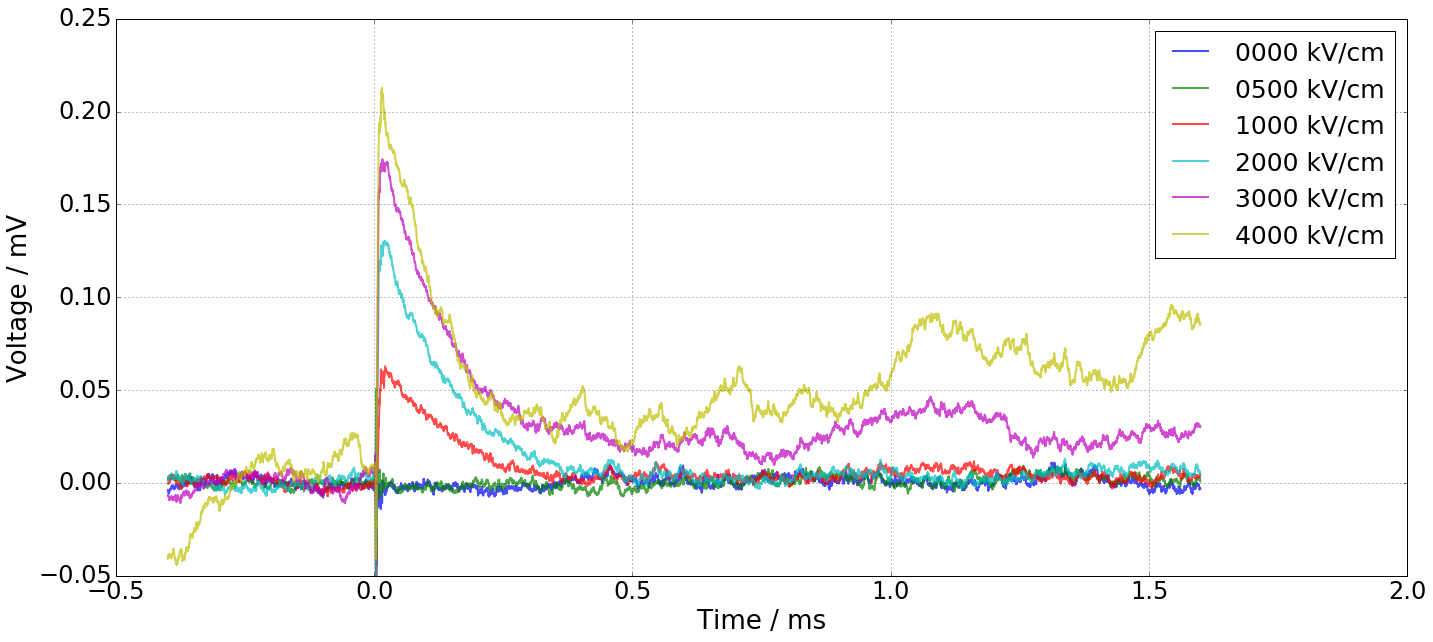

In [120]:
plt.figure(figsize=(20,9))

for q in range(0,len(Datafiles)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
#plt.xlim(0,1)
plt.ylim(-.05,.25)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

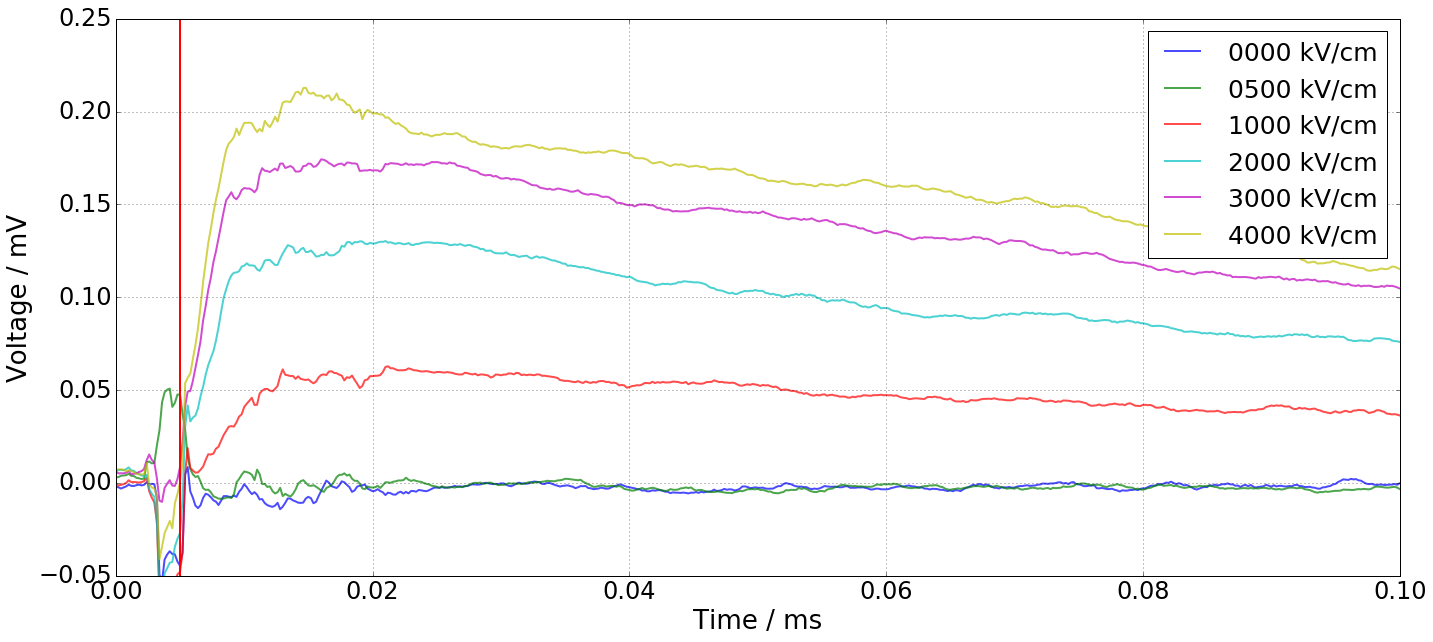

In [95]:
plt.figure(figsize=(20,9))

for q in range(0,len(Datafiles)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,.1)
plt.ylim(-.05,.25)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
plt.axvline(0.005,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

In [101]:
aaa = find_nearest(Xvals[0],0.005)
Left = np.where(Xvals[0]==aaa)[0][0]
aaa = find_nearest(Xvals[0],0.4)
Right = np.where(Xvals[0]==aaa)[0][0]

In [103]:
Field=[]
area =[]
for x in range(0,len(Datafiles)):
    a=Datafiles[x].split('-')[1].split('.')[0]
    Field.append(int(a))
    area.append(sum(Yvals[x][Left:Right]))

<function matplotlib.pyplot.show>

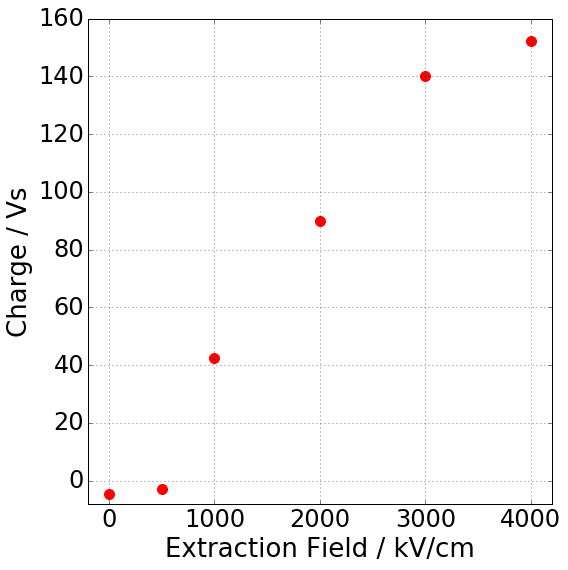

In [119]:
plt.figure(figsize=(8,8))
plt.scatter(Field,area,s=100,color='r')

plt.xlim(-200,4.2e3)
plt.ylim(-8,160)
plt.xticks(np.arange(0, 4100, 1000.0))
plt.xlabel(r'Extraction Field / kV/cm',fontsize=26)
plt.ylabel('Charge / Vs',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.grid()

plt.tight_layout()
plt.show